In [198]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

In [199]:
#reading the text file
with open('ASTR19_S22_group_project_data.txt') as f:
    lines = f.readlines()[3:]
    
    x = [int(line.split()[0]) for line in lines] #Day of the year 
    y = [line.split()[1] for line in lines] #Time in hours:minutes
    z = [float(line.split()[2]) for line in lines] #Tide height in feet

f.close() #close the file

In [200]:
#function
def f_line(x,a,b,c):
    return np.sin((x + a)/b) + c
    
#replace bad chars with a "."
def replace_bad_chars(input_array):
    bad_chars = [';', ':', '!', "*", " "]
    for i in range(len(input_array)):
        for j in bad_chars:
            input_array[i]= input_array[i].replace(j, '.')
    return input_array
    
#convert strings to floats 
def convert_strings_to_floats(input_array):
    output_array = []
    for element in input_array:
        converted_float = float(element)
        output_array.append(converted_float)
    return output_array
    
#sine() function
def sine():
    return np.sin((x+4)/2.2)+2.5

Text(0, 0.5, 'y')

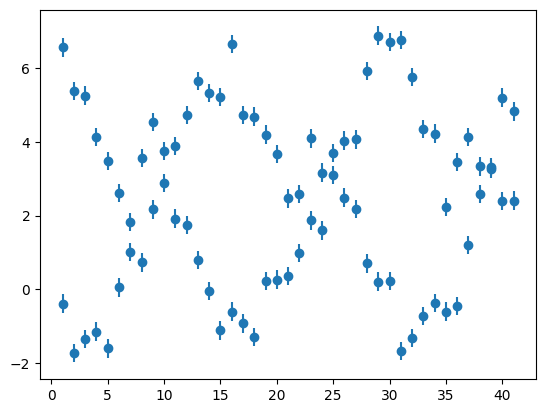

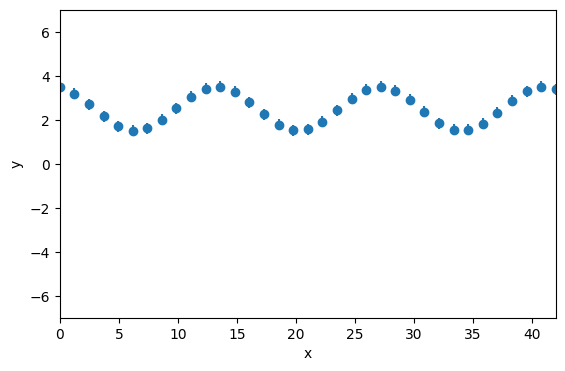

In [201]:
#convert y into floats
y = replace_bad_chars(y)
y = convert_strings_to_floats(y)

# plot error bar with the uncertainty 0.25
plt.errorbar(x,z,0.25,fmt='o')

x_1 = np.linspace(0.,42, 35)
a = 4.0
b = 2.2
c = 2.5
sig = 0.25

#plot figure
y_1 = np.sin((x_1+a)/b) + c
y_err = np.full(35, sig)
f = plt.figure().set_figheight(4)
plt.axis([0,42,-7,7])
plt.errorbar(x_1,y_1,yerr=y_err,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

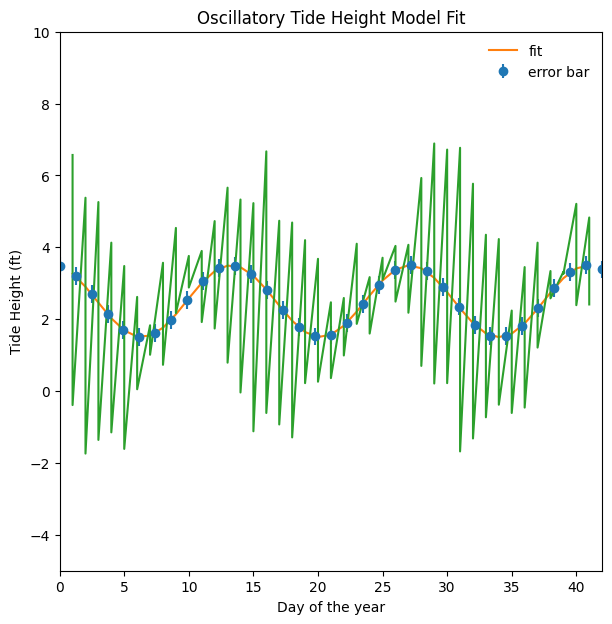

In [207]:
#fit the curve
params, params_cov = optimize.curve_fit(f_line,x_1,y_1,sigma=y_err,p0=[1,2.,0.1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]

y_fit = np.sin((x + a_fit)/b_fit) + c_fit

#plot the figure
f = plt.figure(figsize=(7,7))
plt.errorbar(x_1,y_1,yerr=y_err,fmt='o',label='error bar')
plt.plot(x,y_fit,label='fit')
plt.xlabel('Day of the year')
plt.ylabel('Tide Height (ft)')
plt.title('Oscillatory Tide Height Model Fit')
plt.axis([0,42,-5,10])
plt.legend(loc=0,frameon=False)
plt.plot(x,z)

#save the figure as a PDF
plt.savefig("group_prj_plot.PDF", bbox_inches="tight",facecolor="Blue")